In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"E:\LUMIA 525\DS\Notes\Other\NLP\SMS Spam\SMSSpam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis = 1, inplace = True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
def ham_spam(x):
    if x == 'ham':
        return 1
    else:
        return 0

In [6]:
df["v1"] = df["v1"].apply(ham_spam)

In [7]:
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = df.v1, y = df.count())

In [9]:
df["v1"].unique()

array([1, 0], dtype=int64)

In [10]:
X = df["v2"]
Y = df["v1"]

In [11]:
len(X)

5572

In [12]:
import nltk
import re
from nltk.corpus import stopwords

In [13]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [14]:
corpus =[] 
for i in range(len(X)):
    word = re.sub("^a-zA-Z"," ",X[i])
    word = word.lower()
    word = word.split()
    word = [lem.lemmatize(x) for x in word if not x in set(stopwords.words('english'))]
    word = " ".join(word)
    corpus.append(word)

In [15]:
corpus

['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
 'ok lar... joking wif u oni...',
 "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
 'u dun say early hor... u c already say...',
 'nah think go usf, life around though',
 "freemsg hey darling 3 week's word back! i'd like fun still? tb ok! xxx std chgs send, å£1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'melle melle (oru minnaminunginte nurungu vettam)' set callertune callers. press *9 copy friend callertune",
 'winner!! valued network customer selected receivea å£900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobile 11 month more? u r entitled update latest colour mobile camera free! call mobile update co free 08002986030',
 "i'm gonna home soon want talk stuff anymore tonight, k? i've cried enough today.",
 'six chance win 

In [16]:
len(corpus)

5572

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

In [18]:
X[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
tfidf.inverse_transform(X[0])

[array(['amore', 'available', 'buffet', 'bugis', 'cine', 'crazy', 'go',
        'got', 'great', 'jurong', 'la', 'point', 'wat', 'world'],
       dtype='<U34')]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

# XGBOOST

In [21]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
acc_XGB = round(XGBC.score(X_test, Y_test) * 100, 2)
acc_XGB

96.59

In [22]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(XGBC, X_train, Y_train, cv=10)
confusion_matrix(Y_train, predictions)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None, normalize=None)>

In [24]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       150
           1       0.96      1.00      0.98       965

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



Text(0.5, 1.0, '2-class Precision-Recall curve: AP={0:0.2f}')

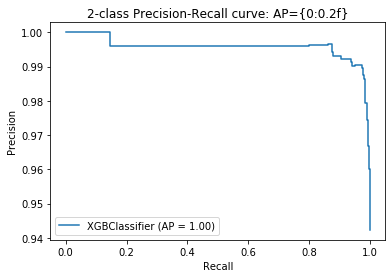

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(XGBC, X_test, Y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')

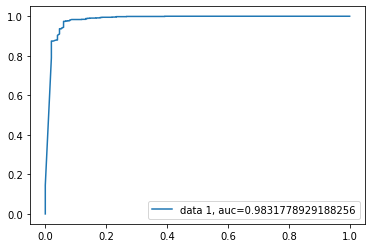

In [26]:
from sklearn import metrics


Y_pred_proba = XGBC.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

probs = XGBC.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()